### Apply K-means to a simple 2-dimensional data set to gain some intuition about how it works

In [1]:
import os
import numpy as np
import pandas as pd
from scipy.io import loadmat 

import matplotlib.pyplot as plt  
import seaborn as sb  
%matplotlib inline

In [2]:
DATAPATH = '../../datasets/'

In [3]:
data = loadmat(os.path.join(DATAPATH, 'ex7data2.mat'))
pd_data = pd.DataFrame(data['X'], columns=['col1', 'col2'])

In [4]:
pd_data.shape

(300, 2)

In [21]:
def initial_centroids(data, no_k):
    ran_values = data.sample(n=no_k)
    return ran_values

def find_closest_centroids(X, centroids):
    m = X.shape[0]
    k = len(centroids)
    idx = np.zeros((m, k))
    cluster_assigned = np.zeros((m))
    for i in range(m):
        for j in range(k):
            dist = np.sum((X.iloc[i,:] - centroids.iloc[j,:]) ** 2)
            idx[i][j] = dist
        cluster_assigned[i] = np.argmin(idx[i])
    return cluster_assigned

def compute_centroids(X, idx, k):  
    m, n = X.shape
    centroids = np.zeros((k, n))

    for i in range(k):
        indices = np.where(idx == i)
        centroids[i,:] = (np.sum(X.iloc[indices], axis=0) / len(indices[0])).ravel()

    return centroids

In [22]:
#to get initial centroids
init_centroids = initial_centroids(pd_data, no_k=3)

In [25]:
def run_k_means(X, init_centroids, max_iters):  
    m, n = X.shape
    k = init_centroids.shape[0]
    idx = np.zeros(m)
    centroids = init_centroids

    for i in range(max_iters):
        #to find closest centroids (index- 0,1,2 depends on k)
        idx = find_closest_centroids(X, centroids)
        #Re calculate Means of each cluster
        centroids = compute_centroids(pd_data, idx, k)
        #converting the np.array to dataframe
        centroids = pd.DataFrame(data=centroids, columns=['col1','col2'])
    return idx, centroids

idx, centroids = run_k_means(pd_data, init_centroids, 10)  

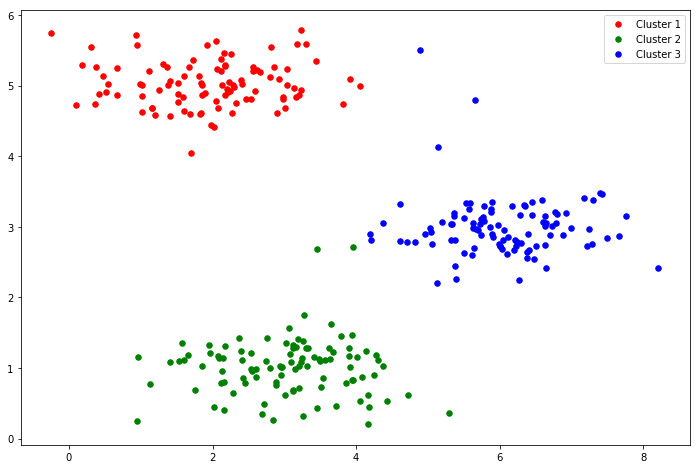

In [26]:
cluster1 = pd_data.iloc[np.where(idx == 0)[0]]   
cluster2 = pd_data.iloc[np.where(idx == 1)[0]]
cluster3 = pd_data.iloc[np.where(idx == 2)[0]] 

fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(cluster1['col1'], cluster1['col2'], s=30, color='r', label='Cluster 1')  
ax.scatter(cluster2['col1'], cluster2['col2'], s=30, color='g', label='Cluster 2')  
ax.scatter(cluster3['col1'], cluster3['col2'], s=30, color='b', label='Cluster 3')  
ax.legend()

### K-means to image compression.

The intuition here is that we can use clustering to find a small number of colors that are most representative of the image, and map the original 24-bit colors to a lower-dimensional color space using the cluster assignments. Here's the image we're going to compress.

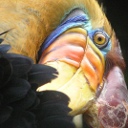

In [41]:
from IPython.display import Image
Image("/Users/srikanth_m07/Documents/ai/ML/Machine-Learning-Andrew-NG/images/fish.png")

We can quickly look at the shape of the data to validate that it looks like what we'd expect for an image.